**Project: Cancer Detection**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 

import matplotlib.pyplot as plt
import seaborn as sns

data = load_breast_cancer()
data

In [5]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (455, 30)
Test size: (114, 30)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size=0.2)


In [7]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("After scaling (train):")
print("Mean (approx):", np.round(X_train_scaled.mean(axis=0), 3))
print("Std (approx):", np.round(X_train_scaled.std(axis=0), 3))


After scaling (train):
Mean (approx): [-0.  0. -0.  0.  0. -0. -0.  0. -0. -0.  0. -0.  0. -0. -0.  0.  0.  0.
  0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0.]
Std (approx): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [8]:
mlp = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation="relu",
    solver="adam",
    max_iter=1000,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)

print("=== MLPClassifier ON Breast Cancer ===" )
print("Test accuracy:", round(acc, 4))

=== MLPClassifier ON Breast Cancer ===
Test accuracy: 0.9649


              precision    recall  f1-score   support

   malignant       0.93      0.98      0.95        42
      benign       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



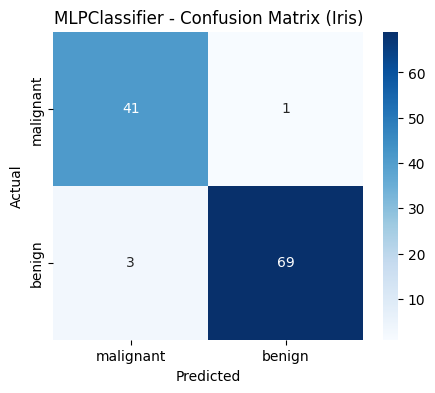

In [10]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title("MLPClassifier - Confusion Matrix (Iris)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show

print(classification_report(y_test, y_pred, target_names=data.target_names))